Explained variance ratio of first two components: [0.99809123 0.00173592]

SVM Classifier Metrics:
Accuracy: 0.7083333333333334
Precision (macro): 0.6882332643202208
Recall (macro): 0.6934822812015794

Decision Tree Classifier Metrics:
Accuracy: 0.9305555555555556
Precision (macro): 0.9479166666666666
Recall (macro): 0.9311740890688259


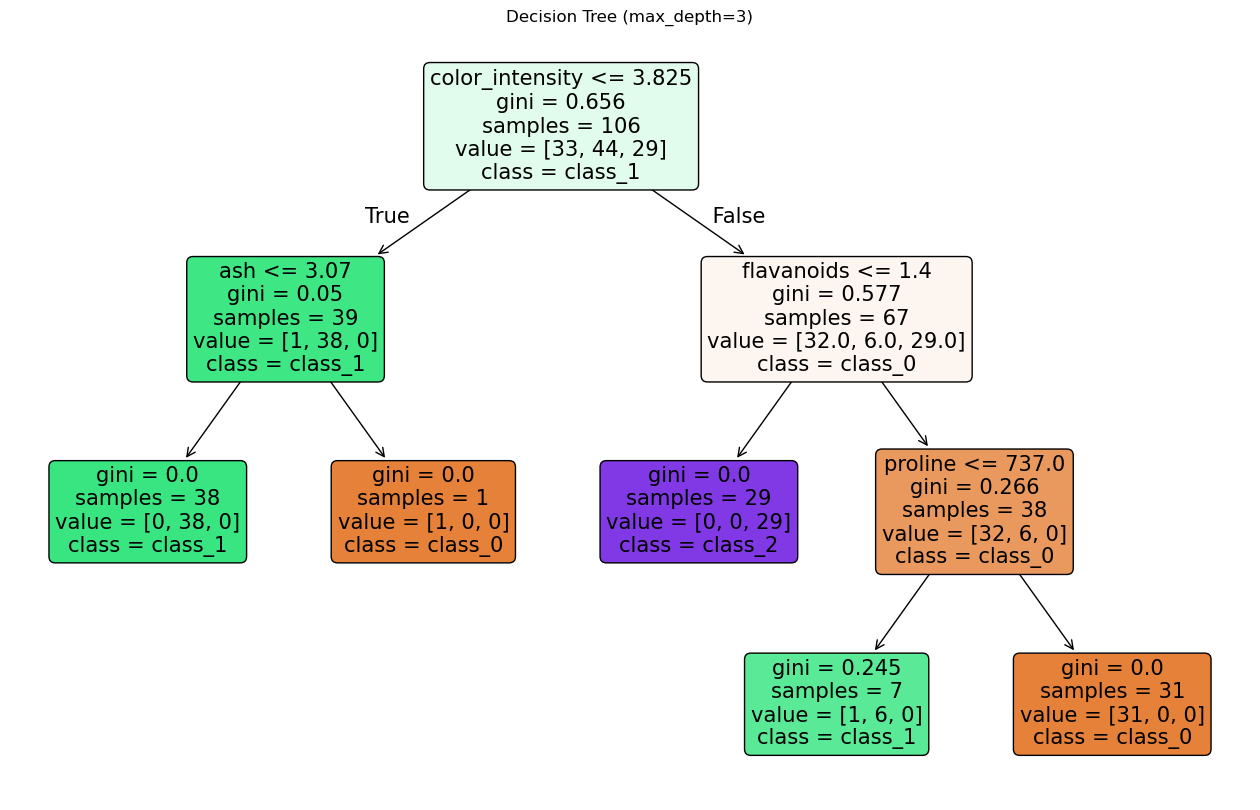

In [1]:
# Problem 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Load Wine dataset
data = load_wine()
X = data.data
y = data.target
feature_names = data.feature_names

# 1(a) PCA - First 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 1(b) Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio of first two components:", explained_variance)

# 1(c) SVM on PCA components
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, random_state=42)

svm = SVC()
svm.fit(X_train_pca, y_train)
y_pred_svm = svm.predict(X_test_pca)

# 1(d) Decision tree on original features
X_train, X_test, _, _ = train_test_split(X, y, test_size=0.4, random_state=42)
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Metrics
print("\nSVM Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision (macro):", precision_score(y_test, y_pred_svm, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_svm, average='macro'))

print("\nDecision Tree Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision (macro):", precision_score(y_test, y_pred_tree, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_tree, average='macro'))

# 1(e) Plot the decision tree
plt.figure(figsize=(16, 10))
plot_tree(tree, feature_names=feature_names, class_names=data.target_names, filled=True, rounded=True)
plt.title("Decision Tree (max_depth=3)")
plt.show()


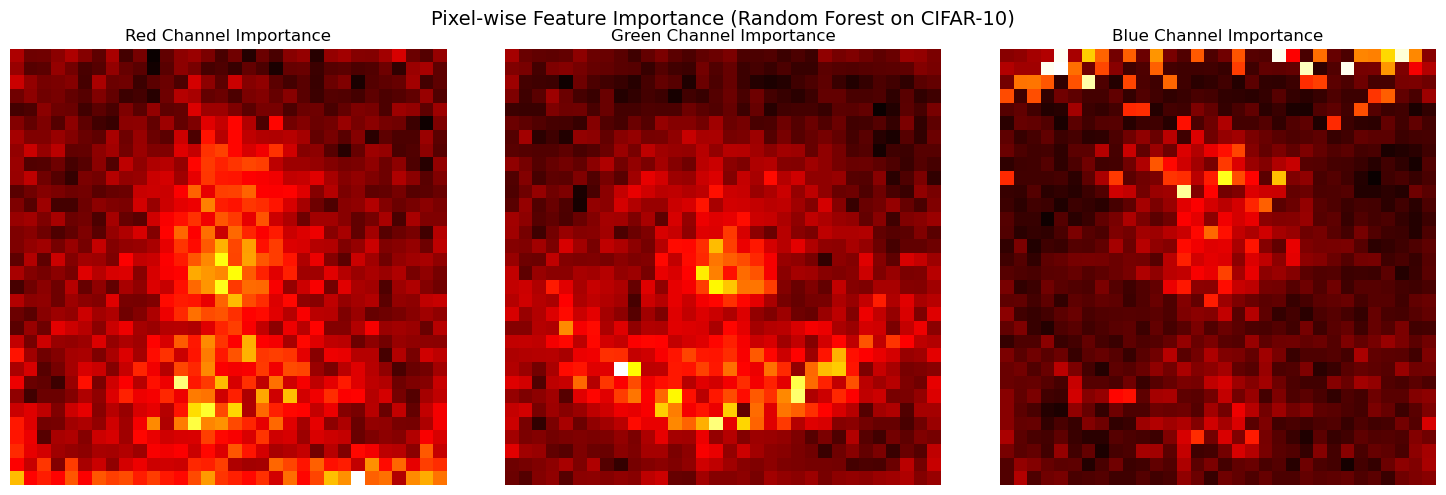

In [2]:
#Problem 2
# Problem 2: Feature Importance on CIFAR-10 using Random Forest

from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = y_train.ravel()
y_test = y_test.ravel()

# Combine train and test sets
X = np.concatenate((x_train, x_test), axis=0)
Y = np.concatenate((y_train, y_test), axis=0)

# Flatten the images (32x32x3 -> 3072 features)
X_flat = X.reshape(X.shape[0], -1)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf.fit(X_flat, Y)

# Extract feature importances and reshape to image dimensions
importances = rf.feature_importances_
importances_image = importances.reshape(32, 32, 3)

# Plot feature importance heatmaps per channel
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
channels = ['Red', 'Green', 'Blue']
for i in range(3):
    axs[i].imshow(importances_image[:, :, i], cmap='hot')
    axs[i].set_title(f'{channels[i]} Channel Importance')
    axs[i].axis('off')

plt.suptitle("Pixel-wise Feature Importance (Random Forest on CIFAR-10)", fontsize=14)
plt.tight_layout()
plt.show()


C:\Users\Tom\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 0.4184 - val_loss: 0.0322
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0375 - val_loss: 0.0288
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0321 - val_loss: 0.0282
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0309 - val_loss: 0.0272
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0314 - val_loss: 0.0278
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0284 - val_loss: 0.0272
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0304 - val_loss: 0.0268
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0305 - val_loss: 0.0269
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0314 - val_loss: 0.0269
Epoch 10/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0280 - val_loss: 0.0272
Epoch 11/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0288 - val_loss: 0.0263
Epoch 12/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0

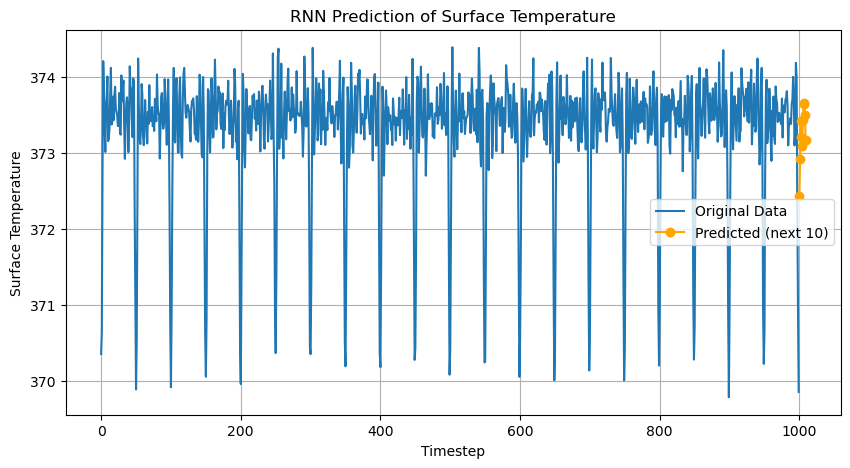

In [5]:
# Problem 3: Predict next 10 timesteps using an RNN (LSTM)

# Problem 3: Predict next 10 timesteps using an RNN (LSTM)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load temperature data
surface_temp = np.load("surface_temp.npy")
temp_data = surface_temp.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler()
temp_scaled = scaler.fit_transform(temp_data)

# Prepare data for RNN
def create_sequences(data, window_size, pred_size):
    X, y = [], []
    for i in range(len(data) - window_size - pred_size + 1):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size:i+window_size+pred_size])
    return np.array(X), np.array(y)

window_size = 20  # Number of timesteps used as input
pred_size = 10    # Number of future steps to predict
X, y = create_sequences(temp_scaled, window_size, pred_size)

# Split into training and validation sets
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_val, y_val = X[split:], y[split:]

# Build the LSTM model
model = Sequential([
    LSTM(64, activation='tanh', input_shape=(window_size, 1)),
    Dense(pred_size)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=1)

# Predict the next 10 timesteps using the last available window
last_window = temp_scaled[-window_size:].reshape(1, window_size, 1)
predicted_scaled = model.predict(last_window)
predicted = scaler.inverse_transform(predicted_scaled.reshape(-1, 1)).flatten()

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(range(1000), temp_data.flatten(), label='Original Data')
plt.plot(range(1000, 1010), predicted, label='Predicted (next 10)', marker='o', color='orange')
plt.xlabel('Timestep')
plt.ylabel('Surface Temperature')
plt.title('RNN Prediction of Surface Temperature')
plt.legend()
plt.grid(True)
plt.show()
